In [1]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import qiskit
from qiskit import Aer, execute, QuantumCircuit, QuantumRegister, IBMQ
from qiskit.circuit import ClassicalRegister
from qiskit.compiler import transpile

In [2]:
IBMQ.load_account()
provider = IBMQ.providers()[-1]

/Users/bpnachman/opt/anaconda3/envs/Qiskit/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
def mybin(input,q,r=1):
    #Utility for converting to binary representation. 
    #r stands for "reverse" because Qiskit's convention is often backwards of mine.
    if (r==0):
        return bin(input).split('b')[1].zfill(q) 
    else:
        return bin(input).split('b')[1].zfill(q)[::-1]

In [4]:
backend = provider.get_backend('ibmq_mumbai')
#coupling_map = backend.configuration().coupling_map

circs = []

for i in range(2**5):
    
    qr = QuantumRegister(25, 'qr')
    cr = ClassicalRegister(25, 'cr')
    circ = QuantumCircuit(qr, cr)

    #Logical qubits
    #circ.h(12)
    #circ.h(13)
    #circ.h(14)
    #circ.h(15)
    #circ.h(16)
    
    binnumber_initial = mybin(i,5)
    for j in range(5):
        if (binnumber_initial[j]=='1'):
            circ.x(qr[j+12])
            pass
        pass
    
    circ.cx(12,10)
    circ.cx(10,7)

    circ.cx(15,18)
    circ.cx(18,21)

    circ.cx(14,11)
    circ.cx(11,8)
    
    circ.cx(16,19)
    circ.cx(19,20)
    
    circ.name='cal_'+binnumber_initial[::-1] #Their convention is backwards of mine.
    circ.name=circ.name
    for i in range(5):
        circ.measure(12+i,12+i)
    circ.measure(7,7)
    circ.measure(10,10)
    circ.measure(18,18)
    circ.measure(21,21)
    circ.measure(11,11)
    circ.measure(8,8)
    circ.measure(19,19)
    circ.measure(20,20)
    mapped_circuit = transpile(circ, backend=backend, optimization_level=0)
    circs+=[mapped_circuit]
    
####


for i in range(2**5):
    
    qr = QuantumRegister(25, 'qr')
    cr = ClassicalRegister(25, 'cr')
    circ = QuantumCircuit(qr, cr)

    #Logical qubits
    #circ.h(12)
    #circ.h(13)
    #circ.h(14)
    #circ.h(15)
    #circ.h(16)
    
    binnumber_initial = mybin(i,5)
    for j in range(5):
        if (binnumber_initial[j]=='1'):
            circ.x(qr[j+12])
            pass
        pass
    
    circ.name='cal2_'+binnumber_initial[::-1] #Their convention is backwards of mine.
    circ.name=circ.name
    for i in range(5):
        circ.measure(12+i,12+i)
    circ.measure(7,7)
    circ.measure(10,10)
    circ.measure(18,18)
    circ.measure(21,21)
    circ.measure(11,11)
    circ.measure(8,8)
    circ.measure(19,19)
    circ.measure(20,20)
    mapped_circuit = transpile(circ, backend=backend, optimization_level=0)
    circs+=[mapped_circuit]

In [5]:
from qiskit.providers.ibmq.managed import IBMQJobManager

In [6]:
#job_manager = IBMQJobManager()
#job_set = job_manager.run(circs, backend=backend, name='myruns', shots=8192)
#print(job_set.job_set_id())

In [7]:
#results = job_set.results()
#for i in range(2*2**5):
#    np.save("results/57bc81dc17104d38ab581c7f341e74e9-1629413911382619_"+str(i)+".npy",results.get_counts(i))

In [8]:
myres = {}
for i in range(2**5):
    myres[i] = np.load("results/57bc81dc17104d38ab581c7f341e74e9-1629413911382619_"+str(i)+".npy",allow_pickle=True).item()
    
myres_nom = {}
for i in range(2**5,2*2**5):
    myres_nom[i-2**5] = np.load("results/57bc81dc17104d38ab581c7f341e74e9-1629413911382619_"+str(i)+".npy",allow_pickle=True).item()

In [9]:
myresponse = np.zeros([2**5,2**5])
myresponse2 = np.zeros([2**5,2**5])
myresponse3 = np.zeros([2**5,2**5])

ovals = {}
ovals[15,0]=[]
ovals[15,1]=[]
ovals[15,2]=[]
ovals[15,3]=[]

ovals[12,0]=[]
ovals[12,1]=[]
ovals[12,2]=[]
ovals[12,3]=[]

ovals[14,0]=[]
ovals[14,1]=[]
ovals[14,2]=[]
ovals[14,3]=[]

ovals[16,0]=[]
ovals[16,1]=[]
ovals[16,2]=[]
ovals[16,3]=[]

for ii in range(2**5):
    vals = myres[ii]
    vals2 = myres[ii].copy()
    vals3 = myres[ii].copy()
    
    vals_nom = myres_nom[ii]
    vals2_nom = myres_nom[ii].copy()
    
    for q in [15,12,14,16]:
        
        iindex = 0
        q1 = 18
        q2 = 21
        if (q==15):
            iindex=3
            q1 = 18
            q2 = 21
        if (q==12):
            iindex=0
            q1 = 10
            q2 = 7
        if (q==14):
            iindex=2
            q1 = 11
            q2 = 8
        if (q==16):
            iindex=4
            q1 = 19
            q2 = 20
    
        corr = 0
        notcorr = 0

        corr2 = 0
        notcorr2 = 0

        corr3 = 0
        notcorr3 = 0

        rightanswer = '0'
        binnumber_initial = mybin(ii,5)
        if (binnumber_initial[iindex]=='1'):
            rightanswer = '1'

        for j in vals:
            if (j[::-1][q]==rightanswer):
                corr+=vals[j]
            else:
                notcorr+=vals[j]

        corrB = 0
        notcorrB = 0

        for j in vals_nom:
            if (j[::-1][q]==rightanswer):
                corrB+=vals_nom[j]
            else:
                notcorrB+=vals_nom[j]

        ierr = 0
        isnoterror = 0
        for j in vals:            
            if (j[::-1][q]=='1' and j[::-1][q1]=='1' and j[::-1][q2]=='1'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error
            if (j[::-1][q]=='0' and j[::-1][q1]=='0' and j[::-1][q2]=='0'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error
            if (j[::-1][q]=='0' and j[::-1][q1]=='0' and j[::-1][q2]=='1'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error
            if (j[::-1][q]=='0' and j[::-1][q1]=='1' and j[::-1][q2]=='0'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error        
            if (j[::-1][q]=='1' and j[::-1][q1]=='0' and j[::-1][q2]=='1'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error
            if (j[::-1][q]=='1' and j[::-1][q1]=='1' and j[::-1][q2]=='0'):
                isnoterror += vals[j]

                if (j[::-1][q]==rightanswer):
                    corr2+=vals[j]
                    corr3+=vals[j]
                else:
                    notcorr2+=vals[j]
                    notcorr3+=vals[j]

                pass #no error      
            if (j[::-1][q]=='1' and j[::-1][q1]=='0' and j[::-1][q2]=='0'):
                ierr += vals[j]
                j_copy = list(j)
                j_copy[25-q-1] = '0'
                j_copy = "".join(j_copy)
                if j_copy in vals2:
                    vals2[j_copy]+=vals2[j]
                else:
                    vals2[j_copy]=vals2[j]
                vals2[j]=0
                vals3[j]=0

                if (j[::-1][q]!=rightanswer):
                    corr2+=vals[j]
                else:
                    notcorr2+=vals[j]

            if (j[::-1][q]=='0' and j[::-1][q1]=='1' and j[::-1][q2]=='1'):
                ierr += vals[j]
                j_copy = list(j)
                j_copy[25-q-1] = '1'
                j_copy = "".join(j_copy)
                if j_copy in vals2:
                    vals2[j_copy]+=vals2[j]
                else:
                    vals2[j_copy]=vals2[j]
                vals2[j]=0
                vals3[j]=0

                if (j[::-1][q]!=rightanswer):
                    corr2+=vals[j]
                else:
                    notcorr2+=vals[j]

        #print("15",ii,rightanswer,notcorr/(corr+notcorr),notcorrB/(corrB+notcorrB),notcorr2/(corr2+notcorr2)) #ierr/(ierr+isnoterror))
        ovals[q,0]+=[notcorr/(corr+notcorr)]   
        ovals[q,1]+=[notcorrB/(corrB+notcorrB)]   
        ovals[q,2]+=[notcorr2/(corr2+notcorr2)]  
        ovals[q,3]+=[notcorr3/(corr3+notcorr3)]  

    for j in vals2_nom:
        myk = int(j[::-1][12:17][::-1],2)
        myresponse[ii,myk]+=vals2_nom[j]/8192
    for j in vals2:
        myk = int(j[::-1][12:17][::-1],2)
        myresponse2[ii,myk]+=vals2[j]
    for j in vals3:
        myk = int(j[::-1][12:17][::-1],2)
        myresponse3[ii,myk]+=vals3[j]
for i in range(32):
    mynorm = 0.
    for j in range(32):
        mynorm+=myresponse2[i,j]
        pass
    for j in range(32):
        myresponse2[i,j]=myresponse2[i,j]/mynorm
        pass
for i in range(32):
    mynorm = 0.
    for j in range(32):
        mynorm+=myresponse3[i,j]
        pass
    for j in range(32):
        myresponse3[i,j]=myresponse3[i,j]/mynorm
        pass

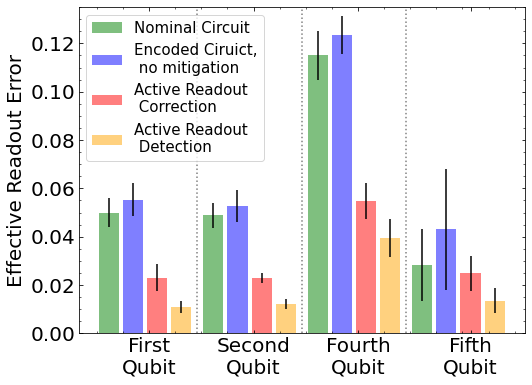

In [10]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.bar(1,np.mean(ovals[15,1]),width=0.25,yerr=np.std(ovals[15,1]),color="green",label="Nominal Circuit",alpha=0.5)
plt.bar(1.3,np.mean(ovals[15,0]),width=0.25,yerr=np.std(ovals[15,0]),color="blue",label="Encoded Ciruict,\n no mitigation",alpha=0.5)
plt.bar(1.6,np.mean(ovals[15,2]),width=0.25,yerr=np.std(ovals[15,2]),color="red",label="Active Readout\n Correction",alpha=0.5)
plt.bar(1.9,np.mean(ovals[15,3]),width=0.25,yerr=np.std(ovals[15,3]),color="orange",label="Active Readout\n Detection",alpha=0.5)

plt.bar(1+1.3+0.3,np.mean(ovals[12,0]),width=0.25,yerr=np.std(ovals[12,0]),color="blue",alpha=0.5)
plt.bar(1+1+0.3,np.mean(ovals[12,1]),width=0.25,yerr=np.std(ovals[12,1]),color="green",alpha=0.5)
plt.bar(1+1.6+0.3,np.mean(ovals[12,2]),width=0.25,yerr=np.std(ovals[12,2]),color="red",alpha=0.5)
plt.bar(1+1.6+0.6,np.mean(ovals[12,3]),width=0.25,yerr=np.std(ovals[12,3]),color="orange",alpha=0.5)

plt.bar(2+1.3+0.6,np.mean(ovals[14,0]),width=0.25,yerr=np.std(ovals[14,0]),color="blue",alpha=0.5)
plt.bar(2+1+0.6,np.mean(ovals[14,1]),width=0.25,yerr=np.std(ovals[14,1]),color="green",alpha=0.5)
plt.bar(2+1.6+0.6,np.mean(ovals[14,2]),width=0.25,yerr=np.std(ovals[14,2]),color="red",alpha=0.5)
plt.bar(2+1.6+0.9,np.mean(ovals[14,3]),width=0.25,yerr=np.std(ovals[14,3]),color="orange",alpha=0.5)

plt.bar(3+1.3+0.9,np.mean(ovals[16,0]),width=0.25,yerr=np.std(ovals[16,0]),color="blue",alpha=0.5)
plt.bar(3+1+0.9,np.mean(ovals[16,1]),width=0.25,yerr=np.std(ovals[16,1]),color="green",alpha=0.5)
plt.bar(3+1.6+0.9,np.mean(ovals[16,2]),width=0.25,yerr=np.std(ovals[16,2]),color="red",alpha=0.5)
plt.bar(3+1.9+0.9,np.mean(ovals[16,3]),width=0.25,yerr=np.std(ovals[16,3]),color="orange",alpha=0.5)

plt.ylim([0,0.135])
plt.xticks([1.5,2.8,4.1,5.5],["First\nQubit","Second\nQubit","Fourth\nQubit","Fifth\nQubit"],fontsize=20)
plt.axvline(2.1,ls=":",color="black",alpha=0.5)
plt.axvline(2.1+1.3,ls=":",color="black",alpha=0.5)
plt.axvline(2.1+1.3+1.3,ls=":",color="black",alpha=0.5)
plt.ylabel("Effective Readout Error",fontsize=20)
plt.legend(fontsize=15,loc="upper left")
fig.savefig('EffectiveReadoutError_v2.pdf',bbox_inches='tight')

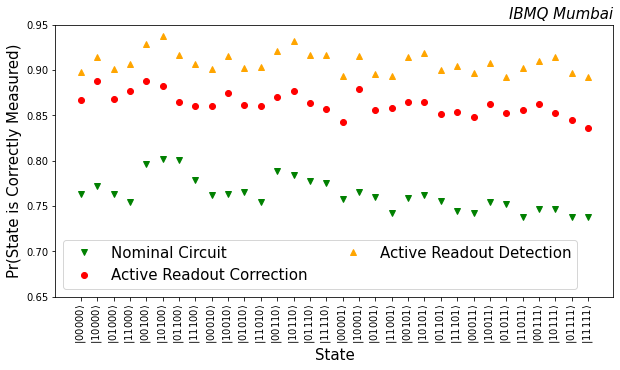

In [11]:
diagonal = [myresponse[i,i] for i in range(32)]
diagonal2 = [myresponse2[i,i] for i in range(32)]
diagonal3 = [myresponse3[i,i] for i in range(32)]

xvals = []
xlabs = []
for i in range(32):
  xvals+=[i]
  xlabs+=[r'$|'+mybin(i,5)+r'\rangle$']
  pass

f = plt.figure(figsize=(10, 5))
plt.plot(range(32),diagonal,label="Nominal Circuit",marker='v',ls='',color='green')
plt.plot(range(32),diagonal2,label="Active Readout Correction",marker='o',ls='',color='red')
plt.plot(range(32),diagonal3,label="Active Readout Detection",marker='^',ls='',color='orange')
_,_=plt.xticks(xvals,xlabs,rotation='vertical',fontsize=10)
plt.xlabel("State",fontsize=15)
plt.ylabel("Pr(State is Correctly Measured)",fontsize=15)
plt.legend(frameon=True,fontsize=15,ncol=2)
plt.title("IBMQ Mumbai",fontstyle="italic",loc="right",fontsize=15)
plt.ylim([0.65,0.95])
f.savefig('FullState_v2.pdf',bbox_inches='tight')